<a href="https://colab.research.google.com/github/jennyrahma/Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jenny Rahma Hidaya]
- **Email:** [m191b4kx2057@bangkit.academy]
- **ID Dicoding:** [jennyrhmaa]

## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Apa faktor yang paling mempengaruhi jumlah penyewaan sepeda per hari?
- Pertanyaan 2 : Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, bulan, hari)?

## Import Semua Packages/Library yang Digunakan

In [52]:
import streamlit as st
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd





## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari beberapa file: day.csv dan hour.csv.
- Variabel kunci yang perlu diperhatikan adalah cnt (jumlah penyewaan), temp (suhu), season (musim), hum (kelembapan), dan windspeed (kecepatan angin).

### Assessing Data

In [ ]:
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print(day_df.describe())


          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

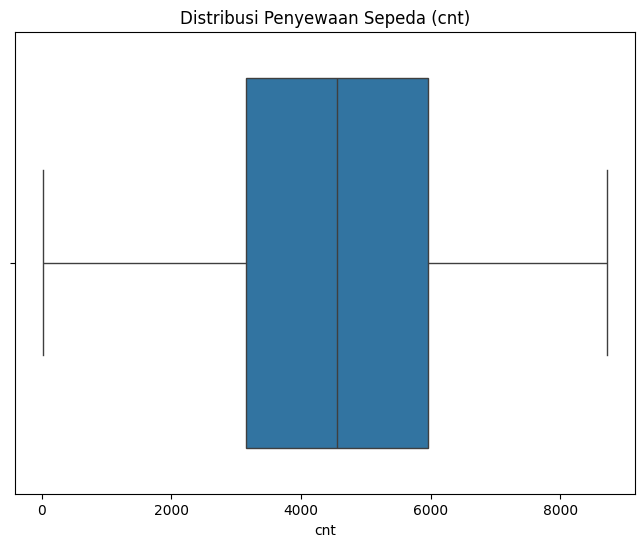

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=day_df['cnt'])
plt.title('Distribusi Penyewaan Sepeda (cnt)')
plt.show()

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset tidak memiliki nilai yang hilang, namun terdapat beberapa outlier yang perlu diperhatikan dalam analisis lanjutan.
- Variabel seperti season dan workingday adalah variabel kategorikal yang mungkin perlu dikonversi menjadi tipe yang sesuai untuk analisis.

### Cleaning Data

In [ ]:
day_df = pd.read_csv("day.csv")

day_df.dropna(axis=0, inplace=True)
day_df.drop_duplicates(inplace=True)

In [ ]:
# Menghapus outlier (contoh: nilai count yang ekstrem)
day_df = day_df[day_df['cnt'] < day_df['cnt'].quantile(0.99)]



**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

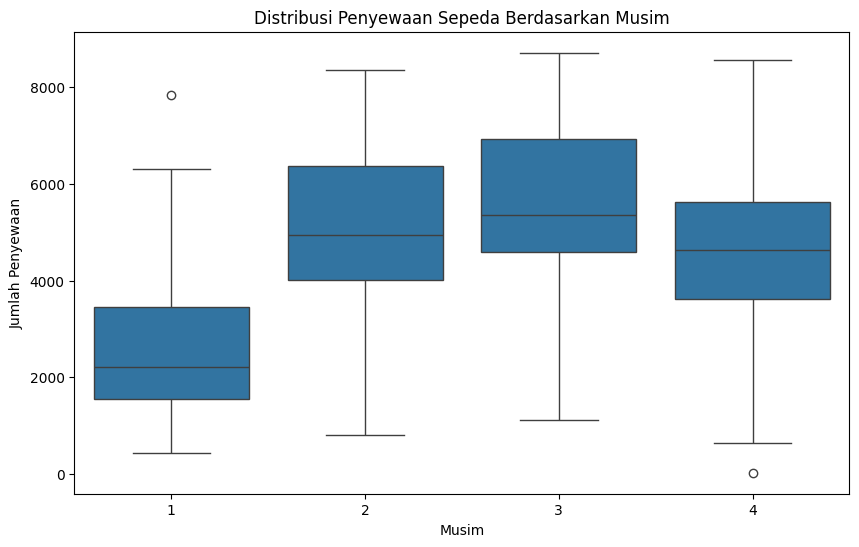

In [ ]:
# Visualisasi distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()


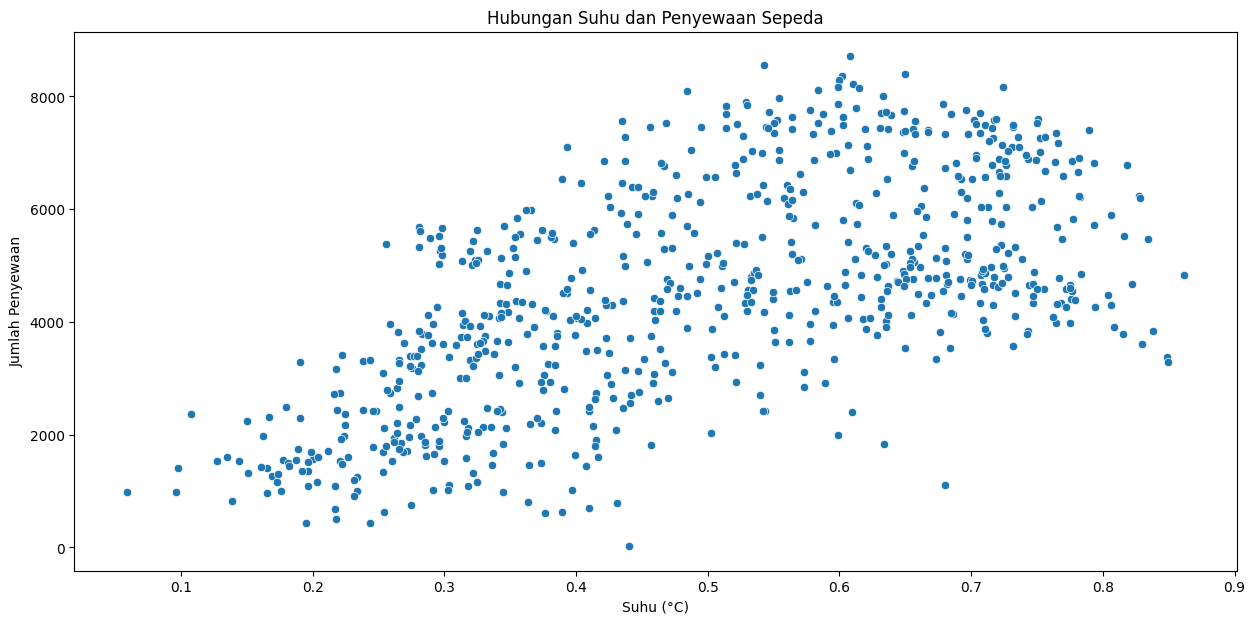

In [ ]:
# Visualisasi hubungan antara suhu dan penyewaan sepeda
plt.figure(figsize=(15,7))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Penyewaan cenderung meningkat seiring dengan naiknya suhu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

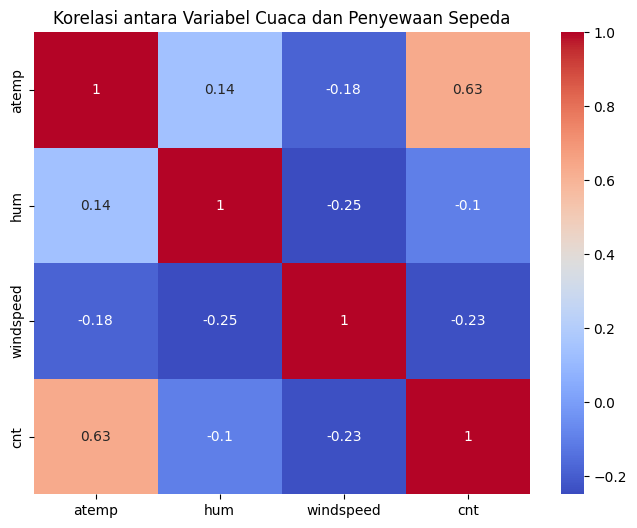

In [ ]:
# Menghitung korelasi
correlation = day_df[['atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel Cuaca dan Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:

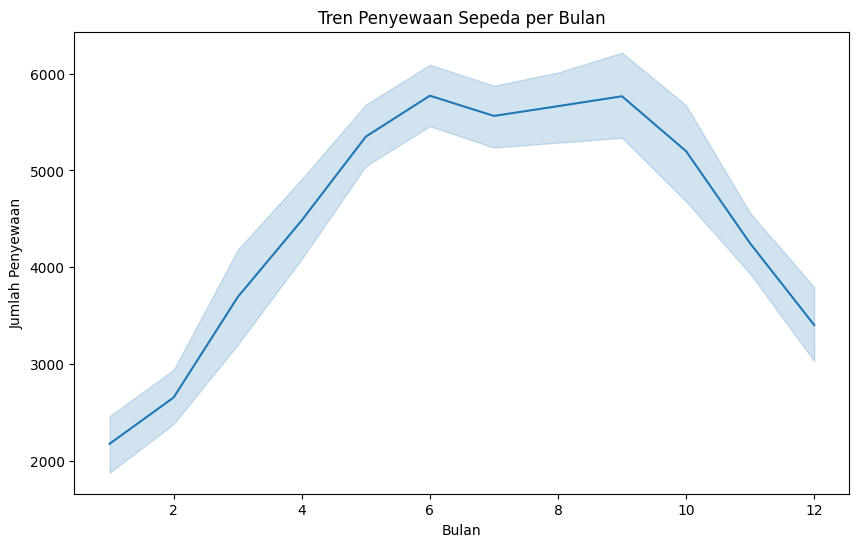

In [ ]:
# Visualisasi tren penggunaan sepeda sepanjang waktu
day_df['mnth'] = pd.to_datetime(day_df['dteday']).dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='mnth', y='cnt', data=day_df)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Pertanyaan 1:
a. Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda.
b. Kelembapan (humidity) dan kecepatan angin (windspeed) memiliki korelasi negatif yang lebih lemah.
- Pertanyaan 2:
Penyewaan sepeda cenderung meningkat pada bulan-bulan musim panas (Juni, Juli, Agustus), dengan puncak penggunaan di bulan Juli.

## Analisis Lanjutan (Opsional)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fitur dan target
X = day_df[['temp', 'hum', 'windspeed']]
y = day_df['cnt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menghitung error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 16592.824286421597


## Conclusion

- Conclution pertanyaan 1: Suhu adalah faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda, sementara kelembapan dan kecepatan angin memiliki pengaruh yang lebih kecil.
- Conclution pertanyaan 2: Pola penggunaan sepeda menunjukkan peningkatan pada bulan-bulan musim panas, dengan puncaknya pada bulan Juli.